In [2]:
# Download sector data (daily)
# Basic Statistics
# Test for correlations in returns over time
# Get volatility daily/yearly
# Train hmm model for market regimes (vol + returns)

# Determine distribution of volatility and returns (normal, stationary)

In [1]:
from yahoofinancials import YahooFinancials
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from sklearn import preprocessing

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

ModuleNotFoundError: No module named 'yahoofinancials'

In [4]:
price_data = pd.read_csv("price_data.csv", index_col=0)
return_data = price_data.pct_change()
return_data = return_data[1:]

In [5]:
display(price_data.head())
display(return_data.head())

,XLK,XLV,XLY,XLF,XLI,XLP,XLU,XLB,XLE,XLRE
2016-01-04,39.048378,64.160652,71.487434,16.964558,46.834759,42.746861,35.747070,38.155636,46.962597,24.997675
2016-01-05,38.946770,64.469078,71.394371,17.029890,46.960136,43.021255,36.003647,38.137768,47.141727,25.755156
2016-01-06,38.466396,63.942940,70.696449,16.768559,46.234772,42.875492,35.937447,37.137913,45.327084,25.506491
2016-01-07,37.330143,62.645744,69.244736,16.296711,44.981068,42.360981,35.697418,36.129120,44.221161,25.038713
2016-01-08,37.034527,61.702354,68.500259,16.042646,44.524361,42.035137,35.680866,35.763084,43.652626,24.710443


,XLK,XLV,XLY,XLF,XLI,XLP,XLU,XLB,XLE,XLRE
2016-01-05,-0.002602,0.004807,-0.001302,0.003851,0.002677,0.006419,0.007178,-0.000468,0.003814,0.030302
2016-01-06,-0.012334,-0.008161,-0.009776,-0.015345,-0.015446,-0.003388,-0.001839,-0.026217,-0.038493,-0.009655
2016-01-07,-0.029539,-0.020287,-0.020534,-0.028139,-0.027116,-0.012000,-0.006679,-0.027163,-0.024399,-0.018340
2016-01-08,-0.007919,-0.015059,-0.010751,-0.015590,-0.010153,-0.007692,-0.000464,-0.010131,-0.012857,-0.013110
2016-01-11,0.006486,-0.011908,0.007879,0.001357,0.000603,0.009384,0.005335,-0.016974,-0.021409,0.005978


In [6]:
sp500 = YahooFinancials('^GSPC')
data = sp500.get_historical_price_data(start_date='2016-01-01', 
                                                  end_date='2021-11-15', 
                                                  time_interval='daily')
sp500_df = pd.DataFrame(data['^GSPC']['prices'])
sp500_df = sp500_df.drop('date', axis=1).set_index('formatted_date')
sp500_df.head()

sp500_df.reset_index(inplace=True,drop=False)
sp500_df.drop(['open','high','low','volume', 'close'],axis=1,inplace=True)
sp500_df = sp500_df.set_index("formatted_date")
sp500_df

,adjclose
formatted_date,
2016-01-04,2012.660034
2016-01-05,2016.709961
2016-01-06,1990.260010
2016-01-07,1943.089966
2016-01-08,1922.030029
...,...
2021-11-08,4701.700195
2021-11-09,4685.250000
2021-11-10,4646.709961


### 150-day interval sector returns correlation

In [7]:
interval_size = 150
def plot_sector_heatmap_i(i):
    corr_i = return_data.iloc[i*interval_size:interval_size*(i+1), :].corr()
    
    chart = px.line(sp500_df.iloc[i*interval_size:interval_size*(i+1), 0], template = "seaborn")
    chart.layout.title = "SP500 Price " + \
        str(return_data.index[i*interval_size])+ " - " + \
        str(return_data.index[(i+1)*interval_size])
    chart.show()
    
    fig = px.imshow(corr_i, range_color=[0,1], labels=dict(x="Sectors", y="Sectors", color = "Corr"), template="seaborn", 
                    color_continuous_scale=px.colors.sequential.amp)
    fig.layout.width = 600
    fig.layout.height = 600
    fig.layout.title = "Sector Correlation Matrix: " + \
        str(return_data.index[i*interval_size])+ " - " + \
        str(return_data.index[(i+1)*interval_size])

    fig.show()
#     fig.write_image("media/heatmap_covid"+str(i)+".jpeg")

plot_sector_heatmap_i(1)

### 150-day rolling sector return correlation

In [8]:
create GIF file with rolling correlations
interval_size = 150
for i in range(0, len(return_data) - 150, 5):
    corr_i = return_data.iloc[i:(i+interval_size), :].corr()
    fig = px.imshow(corr_i, range_color=[0,1], labels=dict(x="Sectors", y="Sectors", color = "Corr"), template="seaborn", 
                    color_continuous_scale=px.colors.sequential.amp)
    fig.layout.width = 600
    fig.layout.height = 600
    fig.layout.title = "Sector Correlation Matrix: " + \
        str(return_data.index[i])+ " - " + \
        str(return_data.index[i+interval_size])
    
    fig.show()
    fig.write_image("heatmap_covid/heatmap_covid_"+str(i)+".jpeg")

In [9]:
vix = YahooFinancials('^VIX')
data = vix.get_historical_price_data(start_date='2016-01-01', 
                                                  end_date='2021-11-15', 
                                                  time_interval='daily')

vix_df = pd.DataFrame(data['^VIX']['prices'])
vix_df = vix_df.drop('date', axis=1).set_index('formatted_date')
vix_df.head()

vix_df.reset_index(inplace=True,drop=False)
vix_df.drop(['open','high','low','volume', 'close'],axis=1,inplace=True)
vix_df = vix_df.set_index("formatted_date")
vix_df

,adjclose
formatted_date,
2016-01-04,20.700001
2016-01-05,19.340000
2016-01-06,20.590000
2016-01-07,24.990000
2016-01-08,27.010000
...,...
2021-11-08,17.219999
2021-11-09,17.780001
2021-11-10,18.730000


In [46]:
# # create GIF file with rolling correlations
interval_size = 150

var_rank = []
for i in range(0, len(return_data) - 150, interval_size):
    temp_data = return_data.iloc[i:(i+interval_size), :]
    var_col_rank = []
    for j in range(0, len(return_data.columns)):
        sector_col = temp_data.iloc[:,j]
        var_col_rank.append(np.percentile(sector_col, 5))
    var_rank.append(var_col_rank)


for i in range(0, len(var_rank)):  
    fig = px.bar(y = return_data.columns,x = var_rank[i], template="seaborn", range_x=[-.08, 0])
    fig.layout.width = 600
    fig.layout.title = "Sector VaR Ranking over Time: " + \
        str(return_data.index[i*interval_size])+ " - " + \
        str(return_data.index[i*interval_size+interval_size])
    fig.show()
    # fig.write_image("var_rank/var_rank_"+str(i)+".jpeg")

<AxesSubplot:ylabel='Count'>

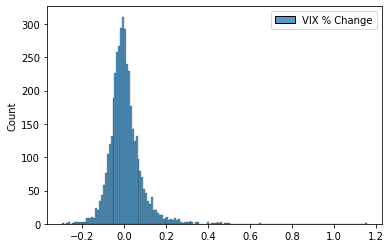

In [12]:
import pandas as pd
import plotly.express as px
import seaborn as sns

vix = pd.read_csv("vix-daily_csv.csv", index_col=0)
vix = vix.drop(["VIX Open", "VIX Low", "VIX High"], axis=1)
vix.columns = ["VIX % Change"]
# vix
sns.histplot(vix.pct_change()[1:], )
# px.histogram(vix.pct_change()[1:])

In [1]:
import pandas as pd
import requests
import json

api_key="5386b780d618348a8ff59740acdadf90"

quote = "INTC"
fr = requests.get(f"https://financialmodelingprep.com/api/v3/financial-ratios/{quote}?apikey={api_key}")
fr = fr.json()


valuation = fr['ratios'][0]['investmentValuationRatios']
profitability = fr['ratios'][0]['profitabilityIndicatorRatios']
operating = fr['ratios'][0]['operatingPerformanceRatios']
liquidity = fr['ratios'][0]['liquidityMeasurementRatios']
debt = fr['ratios'][0]['debtRatios']
valuation = pd.DataFrame(list(valuation.items()),columns=['Ratio', quote])
profitability = pd.DataFrame(list(profitability.items()),columns=['Ratio', quote])
operating = pd.DataFrame(list(operating.items()),columns=['Ratio', quote])
liquidity = pd.DataFrame(list(liquidity.items()),columns=['Ratio', quote])
debt = pd.DataFrame(list(debt.items()),columns=['Ratio', quote])


In [18]:
# ratios = fr["ratios"][0]
# # ratios = pd.DataFrame(list(ratios.items()), columns=["Ratio", quote])
# ratios

ratios = valuation.append(profitability).append(operating).append(liquidity).append(debt)
ratios = ratios.reset_index(drop=True)
ratios



,Ratio,INTC
0,priceBookValueRatio,2.774804856289642
1,priceToBookRatio,2.774804856289642
2,priceToSalesRatio,2.887804024092363
3,priceEarningsRatio,10.759588302981005
4,receivablesTurnover,11.481421409613683
5,priceToFreeCashFlowsRatio,10.743138691127992
6,priceToOperatingCashFlowsRatio,6.3549806676463945
7,priceCashFlowRatio,6.3549806676463945
8,priceEarningsToGrowthRatio,2.073398430106944
9,priceSalesRatio,2.887804024092363
